<a href="https://colab.research.google.com/github/sivannavis/NLP-for-human-rights/blob/main/WordEmbed_for_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Read in 10k dataset demonstration
Previous code in DEI-10k

In [2]:
import pandas as pd
import itertools
import spacy
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

# import chart_studio
# import chart_studio.plotly as py
# import chart_studio.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

from tqdm.notebook import tqdm_notebook
from tqdm import  tqdm
tqdm_notebook.pandas(desc="progress bar")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Connecting to working directory and read in 10k data for a specific year

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# for specific years
selected_year = '2020'

In [5]:
# working directory
%cd "/content/gdrive/MyDrive/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed"
!pwd

/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed
/content/gdrive/.shortcut-targets-by-id/1OPzVNu0CgKsi5tBwlMJVXZTu1EWX9F6C/DFG Cost of Human Rights Violations/Datasets/10k_clean_text/_0.2 paragraphed


In [6]:
dir_10ks = '10ks_para_sics/'
file_name_prefix_10ks = dir_10ks + '10ks_para_sics_'

df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv')

# read with row limits
# df_selected_year_10ks = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = 100)


In [7]:
df_selected_year_10ks.shape

(2017623, 4)

In [8]:

df_selected_year_10ks.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

## **Demonstration of duplication dropping process (ignored for samples)**

In [10]:
# Create 10k column to drop duplicate paragraphs at the 10k level
df_selected_year_10ks['10K_id'] = df_selected_year_10ks.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)

KeyboardInterrupt: ignored

In [ ]:
df_selected_year_10ks_deduped = df_selected_year_10ks.drop_duplicates(subset=['10K_id', 'text'], keep='first')

In [ ]:
df_selected_year_10ks_deduped.drop(['10K_id'], inplace=True, axis=1)

In [ ]:
df_selected_year_10ks_deduped.shape
df_selected_year_10ks_deduped.head()

In [ ]:
selected_year_10ks_dir = f'{selected_year}_DEI_10ks'

In [ ]:
os.mkdir(selected_year_10ks_dir)

In [ ]:
df_selected_year_10ks_deduped.to_csv(f'{selected_year_10ks_dir}/{selected_year}_10ks_deduped.csv.gz', compression='gzip', index=False)

In [ ]:
del df_selected_year_10ks_deduped
del df_selected_year_10ks

# Embedding 1.0 - skip gram with unigram tonkenizers

## data preprocessing

### sampling and dropping duplicates

In [10]:
# 1000-sample example
# for specific years
selected_year = '2020'
# read with row limits
sample = 1000
# df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample, usecols = [3])
df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample)
print(df_selected_year_10ks_sample.shape)


(1000, 4)


In [11]:
# drop duplicates
df_selected_year_10ks_sample['10K_id'] = df_selected_year_10ks_sample.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
df_selected_year_10ks_sample_deduped = df_selected_year_10ks_sample.drop_duplicates(subset=['10K_id', 'text'], keep='first')
df_selected_year_10ks_sample_deduped.drop(['10K_id'], inplace=True, axis=1)
print(df_selected_year_10ks_sample_deduped.shape)

# save to files
selected_year_10ks_sample_dir = f'{selected_year}_DEI_10ks'
# os.mkdir(selected_year_10ks_sample_dir)
df_selected_year_10ks_sample_deduped.to_csv(f'{selected_year_10ks_sample_dir}/{selected_year}_10ks_sample_deduped.csv.gz', compression='gzip', index=False)

(979, 4)


In [12]:
df_selected_year_10ks_sample_deduped.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

### tokenizers(unigram)
text to sentense runtime: ~4s

In [13]:


import pandas as pd
import os
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [14]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words(" "))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [15]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [16]:
sentences = []  # Initialize an empty list of sentences

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in df_selected_year_10ks_sample_deduped['text']:
    # print(text)
    sentences += text_to_sentences(text, tokenizer)

Parsing sentences from training set
Indicate by check mark whether the registrant: (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file such reports) and (2) has been subject to such filing requirements for the past 90 days.    Yes  ☒    No  ☐
Indicate by check mark whether the registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§ 232.405 of this chapter) during the preceding 12 months (or for such shorter period that the registrant was required to submit such files).    Yes  ☒    No  ☐
Indicate by check mark whether the registrant is a large accelerated filer an accelerated filer a non-accelerated filer a smaller reporting company or an emerging growth company. See the definitions of the "large accelerated filer" "accelerated filer" "smaller reporting 

In [17]:
# check sentences
print(len(sentences))
print(sentences[0])

3999
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']


## Training Word2Vec model with uni-gram

In [18]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2022-03-28 14:27:10,452 : INFO : collecting all words and their counts
2022-03-28 14:27:10,454 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-28 14:27:10,493 : INFO : collected 5545 word types from a corpus of 123921 raw words and 3999 sentences
2022-03-28 14:27:10,495 : INFO : Loading a fresh vocabulary
2022-03-28 14:27:10,504 : INFO : effective_min_count=40 retains 512 unique words (9% of original 5545, drops 5033)
2022-03-28 14:27:10,506 : INFO : effective_min_count=40 leaves 92670 word corpus (74% of original 123921, drops 31251)
2022-03-28 14:27:10,511 : INFO : deleting the raw counts dictionary of 5545 items
2022-03-28 14:27:10,513 : INFO : sample=0.001 downsamples 53 most-common words
2022-03-28 14:27:10,514 : INFO : downsampling leaves estimated 57386 word corpus (61.9% of prior 92670)
2022-03-28 14:27:10,524 : INFO : estimated required memory for 512 words and 300 dimensions: 1484800 bytes
2022-03-28 14:27:10,529 : INFO : resetting layer wei

Training model...


2022-03-28 14:27:10,657 : INFO : training model with 4 workers on 512 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-28 14:27:10,809 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 14:27:10,814 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 14:27:10,820 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 14:27:10,828 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-28 14:27:10,830 : INFO : EPOCH - 1 : training on 123921 raw words (57502 effective words) took 0.2s, 349826 effective words/s
2022-03-28 14:27:10,972 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-28 14:27:10,981 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-28 14:27:10,998 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-28 14:27:11,001 : INFO : worker thread finished; awaiting finish of 0 mo

In [66]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(model.wv.doesnt_match("statements term such products cost".split()))
print(model.wv.most_similar("equity"))
print(model.wv.most_similar("patent"))
print(model.wv.similarity("agreement", "statements"))

term
[('investment', 0.9995008707046509), ('employees', 0.9971827864646912), ('debt', 0.996971607208252), ('control', 0.9967048168182373), ('service', 0.9965953826904297), ('sale', 0.9962947368621826), ('issued', 0.9962123036384583), ('taxable', 0.9961662888526917), ('distributions', 0.9958862066268921), ('ownership', 0.9958574771881104)]
[('such', 0.9959632158279419), ('which', 0.9896880388259888), ('patents', 0.9861694574356079), ('intellectual', 0.9850419759750366), ('claims', 0.9841432571411133), ('able', 0.983773946762085), ('if', 0.983095109462738), ('not', 0.9808897376060486), ('third', 0.9797574877738953), ('would', 0.9795460104942322)]
0.52431726


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [25]:
model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('more', 0.9585977792739868),
 ('that', 0.9578635096549988),
 ('would', 0.9536533355712891),
 ('will', 0.9422581195831299),
 ('result', 0.9414169192314148),
 ('do', 0.9412647485733032),
 ('impact', 0.939698338508606),
 ('affect', 0.9393108487129211),
 ('have', 0.9353950619697571),
 ('it', 0.9340128898620605)]

In [26]:
words = model.wv.index2word
print(len(words))
print(words[:100])
print(model['financial'])
# for word in words:
    # print(word,model[word])

524
['the', 'of', 'and', 'to', 'in', 'or', 'a', 'our', 'for', 'we', 'as', 'that', 'with', 'on', 'may', 'be', 'company', 'is', 'are', 'by', 'not', 'other', 'from', 'which', 'any', 'an', 's', 'have', 'such', 'if', 'at', 'properties', 'will', 'product', 'under', 'clinical', 'could', 'lease', 'certain', 'us', 'shares', 'ser', 'including', 'development', 'financial', 'property', 'these', 'december', 'million', 'has', 'its', 'agreement', 'also', 'all', 'subject', 'this', 'products', 'costs', 'approval', 'common', 'future', 'additional', 'business', 'than', 'holdco', 'operating', 'value', 'fda', 'study', 'stock', 'term', 'candidates', 'microbiome', 'based', 'result', 'was', 'it', 'income', 'were', 'operations', 'leases', 'addition', 'rights', 'research', 'expenses', 'market', 'patent', 'statements', 'time', 'ability', 'results', 'related', 'master', 'use', 'more', 'third', 'their', 'over', 'management', 'required']
[-7.18645379e-02 -5.05775474e-02 -7.96697289e-02 -3.70738171e-02
 -4.85505722e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


# Embedding 2.0 tri-gram/bi-gram/uni-gram on skip-gram

## data preprocessing

### sampling and dropping duplicates_copy

In [9]:
# 1000-sample example
# for specific years
selected_year = '2020'
# read with row limits
sample = 3000
# df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample, usecols = [3])
df_selected_year_10ks_sample = pd.read_csv(file_name_prefix_10ks + selected_year + '.csv', nrows = sample)
print(df_selected_year_10ks_sample.shape)


(3000, 4)


In [10]:
# drop duplicates
df_selected_year_10ks_sample['10K_id'] = df_selected_year_10ks_sample.apply(lambda row: row['id'].rsplit('_', 1)[0], axis=1)
df_selected_year_10ks_sample_deduped = df_selected_year_10ks_sample.drop_duplicates(subset=['10K_id', 'text'], keep='first')
df_selected_year_10ks_sample_deduped.drop(['10K_id'], inplace=True, axis=1)
print(df_selected_year_10ks_sample_deduped.shape)

# save to files
selected_year_10ks_sample_dir = f'{selected_year}_DEI_10ks'
# os.mkdir(selected_year_10ks_sample_dir)
df_selected_year_10ks_sample_deduped.to_csv(f'{selected_year_10ks_sample_dir}/{selected_year}_10ks_sample_deduped.csv.gz', compression='gzip', index=False)

(2929, 4)


In [11]:
df_selected_year_10ks_sample_deduped.head()

id ticker_display  \
0  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
1  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
2  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
3  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   
4  2020Q1_MCRB_10-K_20191231_0001564590-20-008002...           MCRB   

  primary_industry_id                                               text  
0               HC-BP  Indicate by check mark whether the registrant:...  
1               HC-BP  Indicate by check mark whether the registrant ...  
2               HC-BP  Indicate by check mark whether the registrant ...  
3               HC-BP  This Annual Report on Form 10-K contains forwa...  
4               HC-BP  In some cases you can identify forward-looking...

### tokenizers(unigram)
text to sentense runtime: ~4s

In [15]:


import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
import nltk.data
import logging
import numpy as np
from gensim.models import Word2Vec
from gensim.models import fasttext


In [16]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

# stopwords_exp = stopwords.words("english") + ['e','d']
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
       'but', 'if', 'because', 's', 't',
       'don', "don't", 'should', "should've", 'now', 'd', 'll',
       'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
       "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
       'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
       'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",
       'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
       'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"] +['e', 'd', 'yes', 'no', 'b', 'k']

def text_to_wordlist( text, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    text = BeautifulSoup(text).get_text()
    #  
    # 2. Remove non-letters
    text = re.sub("[^a-zA-Z]"," ", text)
    #
    # 3. Convert words to lower case and split them
    words = text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(my_stopwords)
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [17]:
# Download the punkt tokenizer for sentence splitting
import nltk.data
nltk.download("popular")   

# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# load stopwords
nltk.download("stopwords")

# Define a function to split a review into parsed sentences
def text_to_sentences( text, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(text.strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( text_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words, so this returns a list of lists
    return sentences

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [18]:
sentences = []  # Initialize an empty list of sentences
nltk.download("stopwords")
from nltk.corpus import stopwords

# Tokenizing
# 3000 samples take 1m20s

# print(df_selected_year_10ks_sample)
print ("Parsing sentences from training set")
for text in df_selected_year_10ks_sample_deduped['text']:
    print(text)
    sentences += text_to_sentences(text, tokenizer, False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Parsing sentences from training set
Indicate by check mark whether the registrant: (1) has filed all reports required to be filed by Section 13 or 15(d) of the Securities Exchange Act of 1934 during the preceding 12 months (or for such shorter period that the registrant was required to file such reports) and (2) has been subject to such filing requirements for the past 90 days.    Yes  ☒    No  ☐
Indicate by check mark whether the registrant has submitted electronically every Interactive Data File required to be submitted pursuant to Rule 405 of Regulation S-T (§ 232.405 of this chapter) during the preceding 12 months (or for such shorter period that the registrant was required to submit such files).    Yes  ☒    No  ☐
Indicate by check mark whether the registrant is a large accelerated filer an accelerated filer a non-accelerated filer a smaller reporting company or a

In [19]:
# check sentences
print(len(sentences))
# print(sentences[0])
print(np.array(sentences[:10]))

# check word list
from gensim import corpora
from gensim.models import TfidfModel

# show dictionary of tokenized text
id2word = corpora.Dictionary(sentences)
print(id2word)
sorted(id2word.token2id.items(), key=lambda x: x[1], reverse=True)
print(id2word.token2id)
# texts = data_bigrams_trigrams
# corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

11949
[list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'])
 list(['yes', 'no'])
 list(['indicate', 'by', 'chec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Dictionary(8656 unique tokens: ['act', 'all', 'and', 'be', 'been']...)
{'act': 0, 'all': 1, 'and': 2, 'be': 3, 'been': 4, 'by': 5, 'check': 6, 'd': 7, 'days': 8, 'during': 9, 'exchange': 10, 'file': 11, 'filed': 12, 'filing': 13, 'for': 14, 'has': 15, 'indicate': 16, 'mark': 17, 'months': 18, 'of': 19, 'or': 20, 'past': 21, 'period': 22, 'preceding': 23, 'registrant': 24, 'reports': 25, 'required': 26, 'requirements': 27, 'section': 28, 'securities': 29, 'shorter': 30, 'subject': 31, 'such': 32, 'that': 33, 'the': 34, 'to': 35, 'was': 36, 'whether': 37, 'no': 38, 'yes': 39, 'chapter': 40, 'data': 41, 'electronically': 42, 'every': 43, 'files': 44, 'interactive': 45, 'pursuant': 46, 'regulation': 47, 'rule': 48, 's': 49, 'submit': 50, 'submitted': 51, 't': 52, 'this': 53, 'a': 54, 'accelerated': 55, 'an': 56, 'company': 57, 'emerging': 58, 'filer': 59, 'growth': 60, 'is': 61, 'large': 62, 'non': 63, 'reporting': 64, 'smaller': 65, 'b': 66, 'definitions': 67, 'in': 68, 'see': 69, 'annual

### [failed] build bi-grams < token-to-phrases-to-token method

In [53]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=5,
                      threshold=7,
                      progress_per=1000)
    return Phraser(phrases)

In [54]:
# build phrase model
phrases_model = build_phrases(sentences)

# save bi-gram phrase model
phrases_model.save('phrases_model.txt')
phrases_model= Phraser.load('phrases_model.txt')

2022-03-28 14:42:53,769 : INFO : collecting all words and their counts
2022-03-28 14:42:53,773 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-03-28 14:42:53,861 : INFO : PROGRESS: at sentence #1000, processed 28116 words and 17592 word types
2022-03-28 14:42:53,919 : INFO : PROGRESS: at sentence #2000, processed 57395 words and 28465 word types
2022-03-28 14:42:53,983 : INFO : PROGRESS: at sentence #3000, processed 88994 words and 39105 word types
2022-03-28 14:42:54,067 : INFO : collected 45600 word types from a corpus of 123921 words (unigram + bigrams) and 3999 sentences
2022-03-28 14:42:54,068 : INFO : using 45600 counts as vocab in Phrases<0 vocab, min_count=5, threshold=7, max_vocab_size=40000000>
2022-03-28 14:42:54,071 : INFO : source_vocab length 45600
2022-03-28 14:42:54,563 : INFO : Phraser built with 1024 phrasegrams
2022-03-28 14:42:54,565 : INFO : saving Phraser object under phrases_model.txt, separately None
2022-03-28 14:42:54,590 : INFO : sa

In [55]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bo-gram concatenation
def sentences_to_bi_grams(n_grams, sentences, output_file_name):
  with open(output_file_name, 'w+') as out_file:
    for sentence in sentences:
        # cleaned_sentence = clean_sentence(sentence)
        # tokenized_sentence = tokenize(cleaned_sentence)
        parsed_sentence = sentence_to_bi_grams(n_grams, sentence)
        out_file.write(parsed_sentence + '\n')

# sentences_to_bi_grams(phrases_model, sentences, "sample_bigram")


# def sentences_to_bi_grams(n_grams, input_file_name, output_file_name):
#     with open(input_file_name, 'r') as input_file_pointer:
#         with open(output_file_name, 'w+') as out_file:
#             for sentence in get_sentences(input_file_pointer):
#                 cleaned_sentence = clean_sentence(sentence)
#                 tokenized_sentence = tokenize(cleaned_sentence)
#                 parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence)
#                 out_file.write(parsed_sentence + '\n')

### bigram tokenizers: phrases within tokenizing (**with Phraser**)

#### n-gram pipelines

In [20]:
from gensim.models.phrases import Phrases, Phraser
def build_phrases(sentences, min_count, threshold):
    phrases = Phrases(sentences,
                      min_count=min_count,
                      threshold=threshold,
                      progress_per=1000)
    return Phraser(phrases)


# build phrase model
bi_phrases_model = build_phrases(sentences, 5, 100)

# save bi-gram phrase model
bi_phrases_model.save('bi_phrases_model.txt')
bi_phrases_model= Phraser.load('bi_phrases_model.txt')


In [21]:
# bi-gram extraction
def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

# bi-gram concatenation
def sentences_to_bi_grams(n_grams, tokenized_sentences, output_file_name): 
    # with open(input_file_name, 'r') as input_file_pointer: 
        with open(output_file_name, 'w+') as out_file: 
            for tokenized_sentence in tokenized_sentences: 
                # clean_sentence = clean_sentence(sentence) 
                # tokenized_sentence = tokenize(cleaned_sentence) 
                parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence) 
                out_file.write(parsed_sentence + '\n')

sentences_to_bi_grams(bi_phrases_model, sentences, "sample_bigram.txt")

# build bi-gram form tokenizers
bi_sentences = []
for bi_sentence in open("sample_bigram.txt").readlines():
  bi_sentences.append(bi_sentence.split())
print(bi_sentences[:10])



[['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days'], ['yes_no'], ['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be', 'submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'submit', 'such', 'files'], ['yes_no'], ['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', '

In [22]:
print(len(bi_phrases_model.phrasegrams.keys()))
print(bi_phrases_model.phrasegrams.keys())


# for bigram in bi_phrases_model.phrasegrams.keys():
#     print(bigram)

# for ngrams, _ in bi_phrases_model.vocab.items():
#     unicode_ngrams = ngrams.decode('utf-8')
#     if '_' in unicode_ngrams:
#         print(unicode_ngrams)

684
dict_keys([(b'check', b'mark'), (b'mark', b'whether'), (b'preceding', b'months'), (b'yes', b'no'), (b'large', b'accelerated'), (b'accelerated', b'filer'), (b'smaller', b'reporting'), (b'emerging', b'growth'), (b'filer', b'smaller'), (b'annual', b'report'), (b'form', b'k'), (b'forward', b'looking'), (b'looking', b'statements'), (b'safe', b'harbor'), (b'differ', b'materially'), (b'you', b'should'), (b'intellectual', b'property'), (b'trade', b'names'), (b'microbiome', b'therapeutics'), (b'therapeutics', b'platform'), (b'ecobiotic', b'microbiome'), (b'colonic', b'microbiome'), (b'immune', b'system'), (b'infectious', b'diseases'), (b'microbiome', b'therapeutic'), (b'clinical', b'trials'), (b'know', b'how'), (b'competitive', b'advantage'), (b'clostridium', b'difficile'), (b'difficile', b'infection'), (b'phase', b'b'), (b'metastatic', b'melanoma'), (b'active', b'mild'), (b'moderate', b'uc'), (b'randomized', b'double'), (b'placebo', b'controlled'), (b'modified', b'mayo'), (b'serious', b'ad

In [23]:

# build trigram and four-gram phrase model
tri_phrases_model = build_phrases(bi_sentences, 5, 10)

# save tri-gram and four-gram phrase model
tri_phrases_model.save('tri_phrases_model.txt')
tri_phrases_model= Phraser.load('tri_phrases_model.txt')

In [24]:
# building tri-gram and four-gram in similar approach
sentences_to_bi_grams(tri_phrases_model, bi_sentences, "sample_trigram.txt")
tri_sentences = []
uni_gram = []
bi_grams = []
tri_grams = []
for tri_sentence in open("sample_trigram.txt").readlines():
    tri_sentences.append(tri_sentence.split())
  
for sentence_i in range(len(tri_sentences)):
  for index in range(len(tri_sentences[sentence_i])-1, 0, -1):
    if tri_sentences[sentence_i][index].count("_") > 2:
      del tri_sentences[sentence_i][index]
    elif tri_sentences[sentence_i][index].count("_") == 1:
      bi_grams.append(tri_sentences[sentence_i][index])
    elif tri_sentences[sentence_i][index].count("_") == 2:
      tri_grams.append(tri_sentences[sentence_i][index])
    else:
      uni_gram.append(tri_sentences[sentence_i][index])

uni_gram = set(uni_gram)
bi_grams = set(bi_grams)
tri_grams =set(tri_grams)
print(tri_sentences[:10])
print(uni_gram)
print(bi_grams)
print(tri_grams)
# print(sum( [len(listElem) for listElem in tri_sentences]))
print(len(set([tuple(t) for t in sentences])))
print(len(uni_gram))
print(len(bi_grams))
print(len(tri_grams))
# print(len(tri_phrases_model.phrasegrams.keys()))
# print(tri_phrases_model.phrasegrams.keys())


[['indicate_by', 'check_mark_whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has_been', 'subject', 'to', 'such', 'filing_requirements', 'for', 'the', 'past_days'], ['yes_no'], ['indicate_by', 'check_mark_whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required', 'to', 'be_submitted', 'pursuant', 'to', 'rule', 'of', 'regulation', 's', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required', 'to', 'submit', 'such', 'files'], ['yes_no'], ['indicate_by', 'check_mark_whether', 'the', 'registrant', 'is', 'a', 'large_accelerated_filer', 'an', 'accelerated_filer'

#### extra tests

In [141]:
# check bi-gram model
print(bi_phrases_model["people in new york go to columbia university".split()])
test_sent = "The human microbiome is one of the richest and most diverse ecosystems on earth with a population of approximately 30 – 50 trillion microorganisms that live in our intestines mouth skin and elsewhere in or on the body.".split()
# ['we', 'are', 'initially', 'focused', 'on', 'implementing', 'our', 'microbiome_therapeutics', 'platform', 'to', 'develop', 'ecobiotic_microbiome', 'therapeutics', 'that', 'treat', 'dysbiosis', 'in', 'the', 'colonic_microbiome', 'one', 'of', 'the', 'most', 'diverse', 'microbial', 'ecologies', 'in', 'the', 'human', 'body']
bi_test = bi_phrases_model[test_sent]
tri_test = tri_phrases_model[bi_test]
print(bi_test)
print(tri_test)

# bi_test = sentence_to_bi_grams(bi_phrases_model, test_sent)
# tri_test = sentence_to_bi_grams(tri_phrases_model, bi_test)
# print(bi_test)
# print(tri_test)


['people', 'in', 'new_york', 'go', 'to', 'columbia', 'university']
['The', 'human', 'microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']
['The', 'human_microbiome', 'is', 'one', 'of', 'the', 'richest', 'and', 'most', 'diverse', 'ecosystems', 'on', 'earth', 'with', 'a', 'population', 'of', 'approximately', '30', '–', '50', 'trillion', 'microorganisms', 'that', 'live', 'in', 'our', 'intestines', 'mouth', 'skin', 'and', 'elsewhere', 'in', 'or', 'on', 'the', 'body.']


In [142]:


# check rows
print(len(sentences))
print(len(bi_sentences))
print(len(tri_sentences))

# check phrases of first sentence
print(sentences[0])
print(bi_sentences[0])
print(tri_sentences[0])
print(len(sentences[0]))
print(len(bi_sentences[0]))
print(len(tri_sentences[0]))
# print(sentences)

11949
11949
11949
['indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding', 'months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate', 'by', 'check_mark', 'whether', 'the', 'registrant', 'has', 'filed', 'all', 'reports', 'required', 'to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities', 'exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such', 'shorter', 'period', 'that', 'the', 'registrant', 'was', 'required', 'to', 'file', 'such', 'reports', 'and', 'has', 'been', 'subject', 'to', 'such', 'filing', 'requirements', 'for', 'the', 'past', 'days']
['indicate_by', 'check_mar

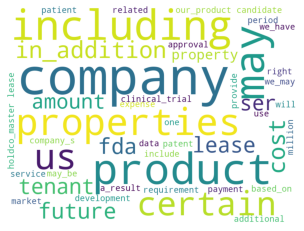

In [64]:

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
fig,ax=plt.subplots()

# with open(r'...\vanity fair.txt') as f:
#     text=f.read()
text = open("sample_bigram.txt").read()

mycloudword=WordCloud(width=800, 
                      height=600, 
                      scale=1, 
                      margin=2,
                      background_color='white',
                      max_words=200, 
                      min_font_size=20, 
                      max_font_size=140,
                      stopwords=STOPWORDS, 
                      random_state=50).generate(text)


ax.imshow(mycloudword)
ax.axis("off")
plt.show()

## Training Word2Vec model with bi-gram tokenizers
runtime: ~1s

In [29]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 20   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
bi_model = word2vec.Word2Vec(bi_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
bi_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
bi_model_name = "200features_20minwords_10context_bigram"
bi_model.save(bi_model_name)

2022-03-30 11:41:44,010 : INFO : collecting all words and their counts
2022-03-30 11:41:44,011 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-30 11:41:44,077 : INFO : PROGRESS: at sentence #10000, processed 301635 words, keeping 8362 word types
2022-03-30 11:41:44,093 : INFO : collected 9145 word types from a corpus of 359141 raw words and 11949 sentences
2022-03-30 11:41:44,094 : INFO : Loading a fresh vocabulary
2022-03-30 11:41:44,103 : INFO : effective_min_count=20 retains 1876 unique words (20% of original 9145, drops 7269)
2022-03-30 11:41:44,104 : INFO : effective_min_count=20 leaves 323714 word corpus (90% of original 359141, drops 35427)
2022-03-30 11:41:44,112 : INFO : deleting the raw counts dictionary of 9145 items
2022-03-30 11:41:44,113 : INFO : sample=0.001 downsamples 45 most-common words
2022-03-30 11:41:44,115 : INFO : downsampling leaves estimated 225406 word corpus (69.6% of prior 323714)
2022-03-30 11:41:44,121 : INFO : estimated

Training model...


2022-03-30 11:41:44,464 : INFO : training model with 4 workers on 1876 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 11:41:44,788 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 11:41:44,794 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 11:41:44,801 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 11:41:44,814 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 11:41:44,815 : INFO : EPOCH - 1 : training on 359141 raw words (225381 effective words) took 0.3s, 655829 effective words/s
2022-03-30 11:41:45,115 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 11:41:45,132 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 11:41:45,137 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 11:41:45,142 : INFO : worker thread finished; awaiting finish of 0 

## Tests for Bi-gram model

### unigram tasks revisit

In [70]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(bi_model.wv.doesnt_match("statements term products cost".split()))
print(bi_model.wv.most_similar("equity"))
print(bi_model.wv.most_similar("patent"))
print(bi_model.wv.similarity("agreement", "statements"))

term
[('due_to', 0.999792218208313), ('amounts', 0.9997806549072266), ('operating', 0.9997774362564087), ('but', 0.9997711181640625), ('income', 0.999763011932373), ('can', 0.9997619986534119), ('corporate', 0.9997580647468567), ('conditions', 0.9997528791427612), ('investments', 0.999748706817627), ('payments', 0.9997476935386658)]
[('made', 0.9996281862258911), ('it_is', 0.999602198600769), ('before', 0.9995973110198975), ('liability', 0.9995805025100708), ('coverage', 0.999579668045044), ('service', 0.9995537996292114), ('can', 0.9995492696762085), ('cost', 0.9995476007461548), ('whether', 0.9995436668395996), ('it', 0.9995430111885071)]
0.99640816


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [71]:
bi_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('united_states', 0.9967228174209595),
 ('drug', 0.9965649843215942),
 ('clinical', 0.9961990714073181),
 ('after', 0.9961965680122375),
 ('disease', 0.9961912631988525),
 ('designation', 0.9960988759994507),
 ('associated_with', 0.9960062503814697),
 ('receive', 0.995975911617279),
 ('more_than', 0.9959595203399658),
 ('data', 0.9959198236465454)]

In [72]:
words = bi_model.wv.index2word
print(len(words))
print(words[:100])
print(model['financial'])
# for word in words:
    # print(word,model[word])

396
['the', 'of', 'and', 'to', 'or', 'in', 'a', 'our', 'for', 'that', 'as', 'is', 'we', 'are', 'with', 'company', 'on', 'by', 'any', 'which', 'from', 'other', 'such', 'may', 'at', 'properties', 'an', 'under', 'us', 'including', 'certain', 'be', 'not', 'ser', 'lease', 'if', 'these', 'december', 'its', 'have', 'development', 'million', 'we_may', 'products', 'fda', 'will', 'company_s', 'also', 'all', 'property', 'future', 'this', 'operations', 'in_addition', 'may_be', 'was', 'has', 'costs', 's', 'shares', 'product', 'were', 'we_have', 'their', 'subject_to', 'use', 'related', 'approval', 'could', 'additional', 'will_be', 'our_product', 'results', 'each', 'research', 'during', 'candidates', 'required', 'data', 'management', 'united_states', 'requirements', 'based_on', 'assets', 'our_business', 'time', 'more', 'one', 'study', 'period', 'terms', 'include', 'expenses', 'rights', 'sears_holdings', 'it', 'holdco_master', 'amount', 'common_shares', 'upon']
[-2.58139987e-02 -1.01507939e-01 -6.3321

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [88]:
print(np.array(bi_sentences[:10]))

[list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'filed', 'all', 'reports', 'required_to', 'be', 'filed', 'by', 'section', 'or', 'd', 'of', 'the', 'securities_exchange', 'act', 'of', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'file', 'such_reports', 'and', 'has_been', 'subject_to', 'such', 'filing_requirements', 'for', 'the', 'past', 'days'])
 list(['yes_no'])
 list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant_has', 'submitted', 'electronically', 'every', 'interactive', 'data', 'file', 'required_to', 'be_submitted', 'pursuant_to', 'rule', 'of', 'regulation_s', 't', 'of', 'this', 'chapter', 'during', 'the', 'preceding_months', 'or', 'for', 'such_shorter', 'period', 'that', 'the', 'registrant_was', 'required_to', 'submit', 'such', 'files'])
 list(['yes_no'])
 list(['indicate_by', 'check_mark', 'whether', 'the', 'registrant', 'is', 'a', 'large_accelerated', 'filer', 'an',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [89]:
# vector comparison

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

words = model.wv.index2word
print(len(words))
print(np.array(words[:100]))

775
['the' 'of' 'and' 'to' 'or' 'in' 'a' 'our' 'for' 'that' 'as' 'with' 'we'
 'is' 'are' 'company' 'on' 'by' 'which' 'any' 'other' 'from' 'may'
 'properties' 'at' 'such' 'under' 'not' 'including' 'us' 'certain' 'ser'
 'lease' 'be' 'if' 'an' 'december' 'these' 'have' 'its' 'we_may'
 'company_s' 'products' 'fda' 'million' 'development' 'all' 'operations'
 'also' 'in_addition' 'property' 'future' 'may_be' 'this' 'has' 'will'
 'were' 'costs' 'shares' 's' 'product' 'we_have' 'use' 'will_be'
 'our_product' 'was' 'their' 'candidates' 'approval' 'during' 'results'
 'united_states' 'related' 'each' 'our_business' 'could' 'based_on' 'data'
 'research' 'include' 'assets' 'terms' 'one' 'additional' 'holdco_master'
 'common_shares' 'more' 'it' 'period' 'management' 'requirements' 'study'
 'with_respect' 'a_result' 'value' 'rights' 'when' 'holdco' 'subject_to'
 'expenses']
512
['the' 'of' 'and' 'to' 'in' 'or' 'a' 'our' 'for' 'we' 'as' 'that' 'with'
 'on' 'may' 'be' 'company' 'is' 'are' 'by' 'not' 'o

In [78]:
# check similarity
print(bi_model.wv.doesnt_match("financial statements terms our_product cost".split()))
print(bi_model.wv.most_similar("performance_obligation"))
print(bi_model.wv.similarity("consolidated_financial", "intellectual_property"))
bi_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

our_product
[('years', 0.9997206926345825), ('over', 0.9996860027313232), ('accounting', 0.999680757522583), ('method', 0.9996769428253174), ('transaction', 0.9996553659439087), ('prior_to', 0.999649167060852), ('two', 0.9996329545974731), ('fair_value', 0.9996291399002075), ('within', 0.9996289014816284), ('contract', 0.9996263980865479)]
0.99800456


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


[('may_be', 0.9988439083099365),
 ('such', 0.9988014698028564),
 ('our_ability', 0.9984623193740845),
 ('more', 0.9984403848648071),
 ('to', 0.9984323978424072),
 ('could', 0.9984145760536194),
 ('may', 0.9983721971511841),
 ('that', 0.9983164072036743),
 ('be', 0.9982485175132751),
 ('result_in', 0.998161256313324)]

In [80]:
# check bi-gram vector

print(bi_model['financial_statements'])

[ 1.87983122e-02 -4.52784374e-02  1.78240065e-04 -6.92998767e-02
 -6.28733486e-02  8.81104358e-03 -3.46368924e-02 -1.09478250e-01
  4.85493392e-02  4.21178080e-02  1.41268820e-01  1.18060365e-01
  1.63614199e-01  9.47266293e-04 -5.43026626e-03  3.83733772e-02
  3.72898728e-02  1.96786374e-01 -2.84680147e-02 -2.58536655e-02
 -4.62494902e-02  9.78386998e-02  4.80938703e-02  7.60323089e-03
  6.29026219e-02  1.51516289e-01  1.99554209e-03 -5.19088954e-02
 -1.88240390e-02  2.88843028e-02  3.49030942e-02 -9.03798342e-02
  6.59036636e-02 -5.55185564e-02 -4.10377458e-02  2.60883681e-02
 -1.36049241e-02  6.07377067e-02  8.13206285e-02  4.79778089e-02
 -5.59574328e-02  7.11861476e-02 -2.10566055e-02  1.15797017e-02
  1.10969022e-02  9.17419232e-03 -1.19810516e-03 -1.15549276e-02
 -9.76547506e-03  9.17602628e-02  7.46617764e-02  1.97635591e-02
  4.45490610e-03  1.54439192e-02  4.68664914e-02 -5.50736226e-02
  1.35281205e-01  1.08510129e-01  1.50367886e-01 -1.33459553e-01
  6.01534285e-02  2.25527

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


## Training Word2Vec model with tri-gram tokenizers
lower min_word_count because of smaller vocab
runtime: ~1s

In [25]:
# Import the built-in logging module and configure it so that Word2Vec 
# output messages
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")

# Using default architecture: skip-gram
tri_model = word2vec.Word2Vec(tri_sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
tri_model.init_sims(replace=True)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
tri_model_name = "200features_10minwords_10context_trigram"
tri_model.save(tri_model_name)

2022-03-30 11:39:54,398 : INFO : collecting all words and their counts
2022-03-30 11:39:54,403 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-30 11:39:54,488 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types
2022-03-30 11:39:54,508 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-30 11:39:54,513 : INFO : Loading a fresh vocabulary
2022-03-30 11:39:54,532 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-30 11:39:54,538 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-30 11:39:54,558 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-30 11:39:54,560 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-30 11:39:54,567 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-30 11:39:54,592 : INFO : estima

Training model...


2022-03-30 11:39:55,642 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 11:39:56,048 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 11:39:56,060 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 11:39:56,067 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 11:39:56,077 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 11:39:56,079 : INFO : EPOCH - 1 : training on 326173 raw words (209692 effective words) took 0.4s, 503179 effective words/s
2022-03-30 11:39:56,539 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 11:39:56,550 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 11:39:56,559 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 11:39:56,568 : INFO : worker thread finished; awaiting finish of 0 

## Tests for 3grams model

### unigram tasks revisit

In [146]:
# checking model results
# model.doesnt_match("identify statements term such".split())
print(tri_model.wv.doesnt_match("statements term products cost".split()))
print(tri_model.wv.most_similar("equity"))
print(tri_model.wv.most_similar("patent"))
print(tri_model.wv.similarity("agreement", "statements"))

term
[('interests', 0.9886375665664673), ('note', 0.9871084094047546), ('recurring', 0.9836004972457886), ('restructuring', 0.9813556671142578), ('portfolio', 0.9781492948532104), ('senior_unsecured', 0.9775498509407043), ('discussion', 0.9764997959136963), ('investment', 0.9763639569282532), ('revenues', 0.9760096073150635), ('annual_report_on', 0.9742156267166138)]
[('does_not', 0.9886793494224548), ('fails', 0.9863079190254211), ('what', 0.9854890704154968), ('renew', 0.9826957583427429), ('practice', 0.9826781153678894), ('imply', 0.9796797633171082), ('product', 0.9793249368667603), ('party', 0.9791011810302734), ('no_assurance', 0.9790675640106201), ('restore', 0.9787293672561646)]
0.27695295


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [147]:
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['properties'], topn = 10)

[('product', 0.9404640793800354),
 ('it', 0.9336739182472229),
 ('it_is', 0.9283263683319092),
 ('must', 0.9094356894493103),
 ('vie', 0.9039958715438843),
 ('does_not', 0.901915431022644),
 ('approved', 0.8990758657455444),
 ('applicable', 0.8957728147506714),
 ('primary_beneficiary', 0.8951925039291382),
 ('bank_holding_company', 0.8935604095458984)]

In [152]:
words = tri_model.wv.index2word
print(len(words))
print(words[:100])
print(tri_model['financial'][:10])
# for word in words:
    # print(word,model[word])

3567
['the', 'of', 'and', 'to', 'our', 'in', 'or', 'a', 'for', 'we', 'that', 'as', 'may', 'are', 'is', 'on', 'with', 'by', 'be', 'any', 'other', 'which', 'from', 'not', 'have', 'if', 'company', 'such', 'at', 'these', 'december', 'an', 'under', 'us', 'properties', 'including', 'certain', 'million', 'could', 'also', 'subject', 'all', 'business', 's', 'its', 'will', 'this', 'future', 'shares', 'operations', 'was', 'result', 'in_addition', 'during', 'management', 'products', 'ability', 'their', 'property', 'were', 'assets', 'company_s', 'development', 'costs', 'time', 'fda', 'required', 'additional', 'lease', 'each', 'will_be', 'svc', 'services', 'related', 'has', 'generally', 'period', 'based_on', 'use', 'results', 'requirements', 'product', 'it', 'treatment', 'reit', 'u_s', 'amount', 'market', 'changes', 'united_states', 'data', 'one', 'financial', 'new', 'product_candidates', 'available', 'include', 'approval', 'agreement', 'tenants']
[-0.04308179  0.02554431  0.11382531  0.05951478 -0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


### Bi-gram tasks

In [154]:
print(np.array(tri_sentences[40:60]))

[list(['from', 'these', 'clinical', 'data', 'we', 'identify', 'the', 'microbiological', 'and', 'functional', 'differences_between', 'a', 'healthy', 'and', 'a', 'diseased', 'microbiome', 'which', 'we', 'then', 'use', 'to', 'design', 'potential', 'ecobiotic_microbiome_therapeutics'])
 list(['after', 'further', 'in', 'lab', 'preclinical_testing', 'selected', 'ecobiotic_microbiome_therapeutic', 'candidates', 'are', 'then', 'studied', 'in', 'clinical_trials'])
 list(['we', 'apply', 'a', 'comparative', 'genomic', 'systems', 'biology', 'framework', 'that', 'leverages', 'proprietary', 'computational', 'microbiological', 'and', 'screening', 'capabilities', 'to', 'design', 'lead', 'candidates', 'that', 'target', 'the', 'microbiological', 'and', 'functional', 'deficiencies', 'identified', 'in', 'the', 'setting', 'of', 'human', 'disease'])
 list(['we', 'are', 'able', 'to', 'apply', 'this', 'framework', 'and', 'experience', 'to', 'clinical', 'data', 'sets', 'from', 'published', 'studies', 'and', 't

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [155]:
# vector comparison
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:500]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

# words = model.wv.index2word
# print(len(words))
# print(np.array(words))

3567
['the' 'of' 'and' 'to' 'our' 'in' 'or' 'a' 'for' 'we' 'that' 'as' 'may'
 'are' 'is' 'on' 'with' 'by' 'be' 'any' 'other' 'which' 'from' 'not'
 'have' 'if' 'company' 'such' 'at' 'these' 'december' 'an' 'under' 'us'
 'properties' 'including' 'certain' 'million' 'could' 'also' 'subject'
 'all' 'business' 's' 'its' 'will' 'this' 'future' 'shares' 'operations'
 'was' 'result' 'in_addition' 'during' 'management' 'products' 'ability'
 'their' 'property' 'were' 'assets' 'company_s' 'development' 'costs'
 'time' 'fda' 'required' 'additional' 'lease' 'each' 'will_be' 'svc'
 'services' 'related' 'has' 'generally' 'period' 'based_on' 'use'
 'results' 'requirements' 'product' 'it' 'treatment' 'reit' 'u_s' 'amount'
 'market' 'changes' 'united_states' 'data' 'one' 'financial' 'new'
 'product_candidates' 'available' 'include' 'approval' 'agreement'
 'tenants' 'more' 'due' 'those' 'ser' 'income' 'applicable' 'securities'
 'operating' 'through' 'no' 'value' 'vicinium' 'significant' 'risk'
 'current'

In [156]:
# check similarity
print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
print(tri_model.wv.most_similar("performance_obligation"))
print(tri_model.wv.similarity("may_be", "in_addition"))
tri_model.wv.most_similar(positive = ['rights', 'patent'], negative = ['operating_partnership'], topn = 10)

terms
[('method', 0.998005747795105), ('transaction_price', 0.9962403178215027), ('until', 0.9962165355682373), ('reference_product', 0.9961352944374084), ('b', 0.9952586889266968), ('six_months', 0.9944313764572144), ('one_year', 0.9942219853401184), ('within_days', 0.9941058158874512), ('days', 0.9940553903579712), ('market_exclusivity', 0.9939128160476685)]


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


KeyError: ignored

In [157]:
# check bi-gram vector

print(tri_model['financial_statements'])

[ 0.03670413  0.04467368  0.07223174 -0.04929886  0.14935064  0.04332414
  0.09428374  0.01245075  0.08956733  0.1849683  -0.00991827  0.004048
  0.00867787 -0.00183245  0.18731722  0.02601435 -0.06376855 -0.00202463
  0.10141489  0.05918287 -0.15032929 -0.05948171 -0.00410475  0.12783767
 -0.06255154 -0.07900032  0.0065693  -0.0085132   0.03942611  0.12115411
 -0.06354938  0.07203832 -0.06971461 -0.08169822 -0.08166199 -0.01734529
 -0.07055935 -0.00586445 -0.06756555 -0.11813731 -0.01180653 -0.09619471
 -0.06796102 -0.15645832  0.06264407  0.17536433  0.13171631  0.03395368
 -0.23214965 -0.13785248  0.01140057 -0.08524673 -0.09437026 -0.07492419
 -0.05999158  0.06735806 -0.13670109 -0.03594421 -0.04085476 -0.182882
 -0.06604591 -0.17266712 -0.00293767  0.11695794 -0.03666683 -0.01953185
  0.04042882 -0.04496082 -0.0209622   0.03455377 -0.05751946  0.05545133
 -0.02700187 -0.02257266  0.11716054  0.10045001 -0.13095695 -0.02655536
  0.0539871   0.1001749   0.05248135  0.00983323  0.017

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


### tasks with DEI terms

In [30]:
# vector comparison
tri_words = tri_model.wv.index2word
print(len(tri_words))
print(np.array(tri_words[:500]))

bi_words = bi_model.wv.index2word
print(len(bi_words))
print(np.array(bi_words[:100]))

3567
['the' 'of' 'and' 'to' 'our' 'in' 'or' 'a' 'for' 'we' 'that' 'as' 'may'
 'are' 'is' 'on' 'with' 'by' 'be' 'any' 'other' 'which' 'from' 'not'
 'have' 'if' 'company' 'such' 'at' 'these' 'december' 'an' 'under' 'us'
 'properties' 'including' 'certain' 'million' 'could' 'also' 'subject'
 'all' 'business' 's' 'its' 'will' 'this' 'future' 'shares' 'operations'
 'was' 'result' 'in_addition' 'during' 'management' 'products' 'ability'
 'their' 'property' 'were' 'assets' 'company_s' 'development' 'costs'
 'time' 'fda' 'required' 'additional' 'lease' 'each' 'will_be' 'svc'
 'services' 'related' 'has' 'generally' 'period' 'based_on' 'use'
 'results' 'requirements' 'product' 'it' 'treatment' 'reit' 'u_s' 'amount'
 'market' 'changes' 'united_states' 'data' 'one' 'financial' 'new'
 'product_candidates' 'available' 'include' 'approval' 'agreement'
 'tenants' 'more' 'due' 'those' 'ser' 'income' 'applicable' 'securities'
 'operating' 'through' 'no' 'value' 'vicinium' 'significant' 'risk'
 'current'

In [33]:
# check similarity

risk_terms=  ['strike', 'sit_in', 'operational_disruption', 'protest', 'injury', 
              'operational_disruption', 'operating_cost', 'delay', 'disruption',
              'lawsuit', 'litigation', 'impoundment', 'detain','penalt', 'sanction', 'court', 'consent_decree',
              'brand_damage', 'monetary_damage','brand_reputation', 'brand_recognition','social_license','decreased_trust','decreased_innovation','lost_opportunity', 'resign',
              'divest', 'restitution', 'conciliation_agreement',
              'modern_slavery', 'debt_bondage', 'human_traffic',
              'alleg', 'accus', 'exploit', 'publicly_expose', 'investigat', 'enforcement', 'security_force', 'inspection', 'inspector',
              'scandal', 'government_action', 'share_price', 'share_value']

practice_terms = ['wage','wage theft','living_wage',
                  'precarity', 'precarious_work','gig_work','alternative_work','alternate_work','contingent_work','informal_work','casual_work','hazardous_work',
                  'confinement', 'document_retention','restriction_of_movement','delayed_wage','pay_manipulation','punishment', 'poor food','deprivation','unpaid_wage', 'delayed_payment','wage_violation',
                  'freedom_of_association','collective_bargaining', 'work_stoppage','hotline',
                  'code_of_conduct', 'due_diligence','ethical_recruit', 'handbook','social_audit','equal_benefits','transparency', 'traceability', 'visibility', 'accessibility','timely_payments','union', 'worker_committee','empower', 'accommodation',
                  'outsource', 'subcontracting','program', 'initiative', 'training','exempt', 'recruit', 'promotion', 'arbitration','mentorship', 'affirmative_action',
                   'order_delay','lead_time','unplanned_shipment','corruption', 'quota_system', 'delayed_payment','weak_governance', 'wage_violation','informal_supply_chain', 'last-minute_order_modification', 'unfair_timing_demand', 'pricing_pressure','poor_forecasting', 'irresponsible_exit']
# print(tri_model.wv.doesnt_match("financial statements terms in_addition cost".split()))
def check_occ(terms, vocab):
  coterms = []
  for term in terms:
    if term in vocab:
      coterms.append(term)
  return coterms

risk_coterms = check_occ(risk_terms, tri_words)
practice_coterms = check_occ(practice_terms, tri_words)


# most and least similar
print("Risks:")
for term in risk_coterms:
  print(term, tri_model.wv.most_similar(term, topn = 5))

print("Practice:")
for term in practice_coterms:
  print(term, tri_model.wv.most_similar(term, topn = 5))

# pair comparison
# print(tri_model.wv.similarity("such_as", "equal_to"))
# print(tri_model.wv.most_similar(positive = ['fair_value', 'equity'], negative = ['risk'], topn = 10))

Risks:
delay [('disruptions', 0.9958087205886841), ('limit', 0.991864800453186), ('significantly', 0.9917248487472534), ('be_harmed', 0.9910443425178528), ('clinical_trials', 0.9905528426170349)]
disruption [('harm', 0.9901459813117981), ('could_adversely_affect', 0.9892722368240356), ('materially', 0.9870861172676086), ('negatively_affect', 0.9851988554000854), ('decline', 0.9844838380813599)]
lawsuit [('qualitative_factors', 0.9967904090881348), ('authority', 0.995965838432312), ('assessed', 0.9948804974555969), ('microbial', 0.9948620796203613), ('determinations', 0.9938321113586426)]
litigation [('financing', 0.9954041242599487), ('compete', 0.9945423603057861), ('issued_patents', 0.9923622012138367), ('incur_substantial', 0.9917044639587402), ('clinical_trials', 0.9911636710166931)]
court [('brought', 0.9984155297279358), ('instrument', 0.997787594795227), ('taken', 0.9969251155853271), ('can_be', 0.9966778755187988), ('matter', 0.996403694152832)]
enforcement [('alleging', 0.9985

In [47]:
# test word analogies
import gensim.downloader as api

# Download the models
# fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')
# word2vec_model300 = api.load('word2vec-google-news-300')
# glove_model300 = api.load('glove-wiki-gigaword-300')
model = api.load("glove-wiki-gigaword-50")

# Correlation with human opinion on word similarity
from gensim.test.utils import datapath
similarities = tri_model.wv.evaluate_word_pairs(datapath('wordsim353.tsv'))


# analogy test
analogy_scores = model.wv.evaluate_word_analogies(datapath('questions-words.txt'))

print("similarities", similarities)
print("analogy", analogy_scores)


[==================================================] 100.0% 66.0/66.0MB downloaded


2022-03-30 11:57:02,163 : INFO : glove-wiki-gigaword-50 downloaded
2022-03-30 11:57:02,166 : INFO : loading projection weights from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
2022-03-30 11:57:20,667 : INFO : loaded (400000, 50) matrix from /root/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
2022-03-30 11:57:20,678 : INFO : Pearson correlation coefficient against /usr/local/lib/python3.7/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.1216
2022-03-30 11:57:20,679 : INFO : Spearman rank-order correlation coefficient against /usr/local/lib/python3.7/dist-packages/gensim/test/test_data/wordsim353.tsv: 0.1949
2022-03-30 11:57:20,681 : INFO : Pairs with unknown words ratio: 85.3%
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  app.launch_new_instance()
2022-03-30 11:57:21,175 : INFO : Evaluating word analogies for top 300000 words

similarities ((0.12160202644907651, 0.3904719950561838), SpearmanrResult(correlation=0.19491109360429257, pvalue=0.1661508645001919), 85.26912181303116)
analogy (0.463717540798522, [{'section': 'capital-common-countries', 'correct': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'), ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'), ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'), ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'), ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'), ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'), ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'), ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'), ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'), ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'), ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'), ('ATHENS', 'GREECE', 'ROME', 'ITALY'), ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'), ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'), ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'), ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'), ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'), ('BAGHDAD', 'IRAQ', 'BERLIN', 'GERMANY'), ('BAGHDAD

## Grid Search for 3-gram model

In [62]:

tri_test = []
for term in risk_coterms:
  tri_test.append(tri_model.wv.most_similar(term, topn = 5))


print(tri_test)
df = pd.DataFrame(data = tri_test, index = risk_coterms, columns = [1,2,3,4,5])
df

[[('disruptions', 0.9958087205886841), ('limit', 0.991864800453186), ('significantly', 0.9917248487472534), ('be_harmed', 0.9910443425178528), ('clinical_trials', 0.9905528426170349)], [('harm', 0.9901459813117981), ('could_adversely_affect', 0.9892722368240356), ('materially', 0.9870861172676086), ('negatively_affect', 0.9851988554000854), ('decline', 0.9844838380813599)], [('qualitative_factors', 0.9967904090881348), ('authority', 0.995965838432312), ('assessed', 0.9948804974555969), ('microbial', 0.9948620796203613), ('determinations', 0.9938321113586426)], [('financing', 0.9954041242599487), ('compete', 0.9945423603057861), ('issued_patents', 0.9923622012138367), ('incur_substantial', 0.9917044639587402), ('clinical_trials', 0.9911636710166931)], [('brought', 0.9984155297279358), ('instrument', 0.997787594795227), ('taken', 0.9969251155853271), ('can_be', 0.9966778755187988), ('matter', 0.996403694152832)], [('alleging', 0.998544454574585), ('civil_penalties', 0.9981743097305298), 

1  \
delay                (disruptions, 0.9958087205886841)   
disruption                  (harm, 0.9901459813117981)   
lawsuit      (qualitative_factors, 0.9967904090881348)   
litigation             (financing, 0.9954041242599487)   
court                    (brought, 0.9984155297279358)   
enforcement              (alleging, 0.998544454574585)   

                                                        2  \
delay                          (limit, 0.991864800453186)   
disruption   (could_adversely_affect, 0.9892722368240356)   
lawsuit                    (authority, 0.995965838432312)   
litigation                  (compete, 0.9945423603057861)   
court                     (instrument, 0.997787594795227)   
enforcement         (civil_penalties, 0.9981743097305298)   

                                                3  \
delay         (significantly, 0.9917248487472534)   
disruption       (materially, 0.9870861172676086)   
lawsuit            (assessed, 0.9948804974555969)   
litigation   (issued_patents, 0.9923622012138367)   
court                 (taken, 0.9969251155853271)   
enforcement      (guidelines, 0.9981439113616943)   

                                                   4  \
delay                (be_harmed, 0.9910443425178528)   
disruption   (negatively_affect, 0.9851988554000854)   
lawsuit              (microbial, 0.9948620796203613)   
litigation   (incur_substantial, 0.9917044639587402)   
court                   (can_be, 0.9966778755187988)   
enforcement       (maryland_law, 0.9981059432029724)   

                                                 5  
delay        (clinical_trials, 0.9905528426170349)  
disruption           (decline, 0.9844838380813599)  
lawsuit       (determinations, 0.9938321113586426)  
litigation   (clinical_trials, 0.9911636710166931)  
court                  (matter, 0.996403694152832)  
enforcement         (function, 0.9980302453041077)

In [109]:
# Set values for various parameters
num_features = [200]    # Word vector dimensionality                      
min_word_count = [10]   # Minimum word count - this limits vocabulary size              
num_workers = 4       # Number of threads to run in parallel
context = [10]          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

def gs(tokenizers, min_count = min_word_count, context_size = context, vector_size = num_features):
  # dataframes
  dfs = []
  
  for min_word_count in min_count:
    for context in context_size:
      for num_features in vector_size:
        print("Training model...")

        # Using default architecture: skip-gram
        tri_model = word2vec.Word2Vec(tokenizers, workers=num_workers, \
                size=num_features, min_count = min_word_count, \
                window = context, sample = downsampling)
        
        tri_test = []
        for term in risk_coterms:
          tri_test.append(tri_model.wv.most_similar(term, topn = 5))
        
        dfs.append(pd.DataFrame(data = tri_test, index = risk_coterms, columns = [1,2,3,4,5]))
        
  return dfs

### grid search for num_features

In [110]:
nf_gs = gs(tri_sentences, vector_size = [100, 200, 300])


2022-03-30 14:13:20,759 : INFO : collecting all words and their counts
2022-03-30 14:13:20,761 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-30 14:13:20,816 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types
2022-03-30 14:13:20,829 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-30 14:13:20,830 : INFO : Loading a fresh vocabulary
2022-03-30 14:13:20,845 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-30 14:13:20,846 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-30 14:13:20,858 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-30 14:13:20,860 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-30 14:13:20,861 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-30 14:13:20,872 : INFO : estima

Training model...


2022-03-30 14:13:21,537 : INFO : training model with 4 workers on 3567 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 14:13:21,785 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:21,799 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:21,807 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:21,816 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:21,820 : INFO : EPOCH - 1 : training on 326173 raw words (209860 effective words) took 0.3s, 760583 effective words/s
2022-03-30 14:13:22,066 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:22,074 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:22,080 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:22,087 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-03-30 14:13:23,706 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 14:13:24,009 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:24,022 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:24,023 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:24,029 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:24,031 : INFO : EPOCH - 1 : training on 326173 raw words (209638 effective words) took 0.3s, 660823 effective words/s
2022-03-30 14:13:24,336 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:24,344 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:24,349 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:24,357 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-03-30 14:13:26,178 : INFO : training model with 4 workers on 3567 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 14:13:26,569 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:26,577 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:26,582 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:26,584 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:26,588 : INFO : EPOCH - 1 : training on 326173 raw words (209873 effective words) took 0.4s, 522610 effective words/s
2022-03-30 14:13:26,984 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:27,002 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:27,005 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:27,013 : INFO : worker thread finished; awaiting finish of 0 

In [111]:
# from google.colab import data_table
# from vega_datasets import data

# data_table.enable_dataframe_formatter()

for df in nf_gs:
  display(df)

1  \
delay                     (limit, 0.991411030292511)   
disruption   (capital_resources, 0.9935198426246643)   
lawsuit              (considers, 0.9950860738754272)   
litigation             (execute, 0.9913508892059326)   
court                  (investor, 0.997330367565155)   
enforcement           (monetary, 0.9978857040405273)   

                                             2  \
delay          (attention, 0.9846485257148743)   
disruption        (growth, 0.9911965131759644)   
lawsuit      (requirement, 0.9946236610412598)   
litigation       (factors, 0.9881299734115601)   
court         (definition, 0.9963529706001282)   
enforcement   (innovation, 0.9973013401031494)   

                                                       3  \
delay                        (cause, 0.9841225147247314)   
disruption                  (negative, 0.98997563123703)   
lawsuit      (competent_authorities, 0.9942488670349121)   
litigation          (issued_patents, 0.9877081513404846)   
court                          (eea, 0.9958480596542358)   
enforcement                   (acts, 0.9965863227844238)   

                                                   4  \
delay                  (prevent, 0.9830645322799683)   
disruption                (harm, 0.9889195561408997)   
lawsuit                 (summary, 0.993443489074707)   
litigation   (substantial_costs, 0.9875127673149109)   
court                 (approach, 0.9954882860183716)   
enforcement         (continuing, 0.9964877367019653)   

                                                     5  
delay                  (financing, 0.9826306700706482)  
disruption             (liquidity, 0.9885400533676147)  
lawsuit                  (meaning, 0.9926312565803528)  
litigation                (events, 0.9869736433029175)  
court        (european_commission, 0.9950852990150452)  
enforcement                 (self, 0.9964050054550171)

1  \
delay         (significantly, 0.9942436218261719)   
disruption        (prospects, 0.9953776597976685)   
lawsuit            (utilizes, 0.9969781637191772)   
litigation          (actions, 0.9965264201164246)   
court               (country, 0.9982824325561523)   
enforcement  (considerations, 0.9982677102088928)   

                                                  2  \
delay             (disruptions, 0.9942288398742676)   
disruption   (could_materially, 0.9922017455101013)   
lawsuit            (evaluation, 0.9957942366600037)   
litigation   (their_businesses, 0.9949638247489929)   
court                  (can_be, 0.9980222582817078)   
enforcement           (heavily, 0.9981716871261597)   

                                              3  \
delay                (limit, 0.993319034576416)   
disruption           (near, 0.9890268445014954)   
lawsuit      (public_health, 0.995073676109314)   
litigation     (attractive, 0.9949427843093872)   
court              (cannot, 0.9975154399871826)   
enforcement   (challenging, 0.9981595277786255)   

                                                    4  \
delay                (successfully, 0.99208664894104)   
disruption         (interruption, 0.9889965057373047)   
lawsuit              (as_defined, 0.9949912428855896)   
litigation   (criminal_penalties, 0.9945328235626221)   
court                    (update, 0.9974430203437805)   
enforcement                 (aca, 0.9980737566947937)   

                                                         5  
delay        (proprietary_information, 0.9911818504333496)  
disruption                (could_harm, 0.9883765578269958)  
lawsuit                        (group, 0.9946555495262146)  
litigation                    (delays, 0.9941539764404297)  
court                         (enroll, 0.9974259734153748)  
enforcement                     (acts, 0.9980617165565491)

1  \
delay                   (affect, 0.9949155449867249)   
disruption   (operating_results, 0.9950728416442871)   
lawsuit                 (exists, 0.9960504174232483)   
litigation      (issued_patents, 0.9934926629066467)   
court                (before_it, 0.9985248446464539)   
enforcement            (replace, 0.9978533983230591)   

                                                       2  \
delay                (significantly, 0.9932388067245483)   
disruption               (effect_on, 0.9929397106170654)   
lawsuit      (competent_authorities, 0.9948788285255432)   
litigation              (require_us, 0.9911468029022217)   
court                      (country, 0.9981439113616943)   
enforcement                   (vary, 0.9977315664291382)   

                                                  3  \
delay               (materially, 0.991109311580658)   
disruption   (adversely_affect, 0.9922477006912231)   
lawsuit            (evaluation, 0.9944418668746948)   
litigation           (volatile, 0.9897228479385376)   
court                    (best, 0.9975882768630981)   
enforcement        (withdrawal, 0.9975226521492004)   

                                                    4  \
delay               (disruptions, 0.9902455806732178)   
disruption   (a_material_adverse, 0.9896867871284485)   
lawsuit           (public_health, 0.9941450357437134)   
litigation            (financing, 0.9889545440673828)   
court                  (decision, 0.9971489906311035)   
enforcement      (interpretation, 0.9973829984664917)   

                                               5  
delay                 (limit, 0.989448606967926)  
disruption       (be_harmed, 0.9886893033981323)  
lawsuit                (her, 0.9940345287322998)  
litigation   (commercialize, 0.9888546466827393)  
court              (brought, 0.9971143007278442)  
enforcement          (exist, 0.9971749186515808)

### grid search for context window size


In [112]:
cs_gs = gs(tri_sentences, context_size = [5, 10, 20])

2022-03-30 14:13:52,566 : INFO : collecting all words and their counts
2022-03-30 14:13:52,569 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-30 14:13:52,627 : INFO : PROGRESS: at sentence #10000, processed 273328 words, keeping 9843 word types
2022-03-30 14:13:52,640 : INFO : collected 10689 word types from a corpus of 326173 raw words and 11949 sentences
2022-03-30 14:13:52,642 : INFO : Loading a fresh vocabulary
2022-03-30 14:13:52,655 : INFO : effective_min_count=10 retains 3567 unique words (33% of original 10689, drops 7122)
2022-03-30 14:13:52,657 : INFO : effective_min_count=10 leaves 300696 word corpus (92% of original 326173, drops 25477)
2022-03-30 14:13:52,672 : INFO : deleting the raw counts dictionary of 10689 items
2022-03-30 14:13:52,674 : INFO : sample=0.001 downsamples 37 most-common words
2022-03-30 14:13:52,675 : INFO : downsampling leaves estimated 209786 word corpus (69.8% of prior 300696)
2022-03-30 14:13:52,686 : INFO : estima

Training model...


2022-03-30 14:13:53,315 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2022-03-30 14:13:53,592 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:53,600 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:53,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:53,610 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:53,611 : INFO : EPOCH - 1 : training on 326173 raw words (209805 effective words) took 0.3s, 729267 effective words/s
2022-03-30 14:13:53,886 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:53,890 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:53,905 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:53,913 : INFO : worker thread finished; awaiting finish of 0 m

Training model...


2022-03-30 14:13:55,619 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2022-03-30 14:13:55,920 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:55,943 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:55,950 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:55,959 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:55,960 : INFO : EPOCH - 1 : training on 326173 raw words (210017 effective words) took 0.3s, 630601 effective words/s
2022-03-30 14:13:56,268 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:56,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:56,279 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:56,285 : INFO : worker thread finished; awaiting finish of 0 

Training model...


2022-03-30 14:13:58,120 : INFO : training model with 4 workers on 3567 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=20
2022-03-30 14:13:58,467 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:58,483 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:58,493 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:58,498 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-03-30 14:13:58,499 : INFO : EPOCH - 1 : training on 326173 raw words (209720 effective words) took 0.4s, 564785 effective words/s
2022-03-30 14:13:58,847 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-03-30 14:13:58,849 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-03-30 14:13:58,865 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-03-30 14:13:58,871 : INFO : worker thread finished; awaiting finish of 0 

In [113]:
for df in cs_gs:
  display(df)

1  \
delay                            (execute, 0.9954470992088318)   
disruption                        (growth, 0.9921197295188904)   
lawsuit                          (summary, 0.9960049390792847)   
litigation   (intellectual_property_rights, 0.993780255317688)   
court                             (enroll, 0.9968338012695312)   
enforcement                       (around, 0.9988961815834045)   

                                                   2  \
delay            (profitability, 0.9950907230377197)   
disruption   (capital_resources, 0.9904953241348267)   
lawsuit                 (exists, 0.9950509071350098)   
litigation             (enforce, 0.9926408529281616)   
court           (periodic_basis, 0.9967703819274902)   
enforcement     (considerations, 0.9988024234771729)   

                                               3  \
delay        (other_factors, 0.9945409893989563)   
disruption       (liquidity, 0.9889633655548096)   
lawsuit         (determines, 0.9949301481246948)   
litigation   (trade_secrets, 0.9921185970306396)   
court              (country, 0.9960270524024963)   
enforcement       (activity, 0.9987938404083252)   

                                                            4  \
delay                         (financing, 0.9935827255249023)   
disruption                      (decline, 0.9885734915733337)   
lawsuit                           (meets, 0.9940404295921326)   
litigation   (successfully_commercialize, 0.9913493394851685)   
court                           (instead, 0.9957438111305237)   
enforcement                      (issuing, 0.998496949672699)   

                                                    5  
delay                (materially, 0.9934588670730591)  
disruption                 (turn, 0.9879014492034912)  
lawsuit      (check_mark_whether, 0.9937092065811157)  
litigation   (future_legislation, 0.9908138513565063)  
court                       (esl, 0.9956721067428589)  
enforcement            (investor, 0.9983841180801392)

1  \
delay        (significantly, 0.9951364994049072)   
disruption        (prospects, 0.991375744342804)   
lawsuit         (registrant, 0.9947581887245178)   
litigation       (inability, 0.9942013025283813)   
court               (agency, 0.9985110759735107)   
enforcement      (carefully, 0.9983760714530945)   

                                              2  \
delay        (successfully, 0.9939913749694824)   
disruption     (confidence, 0.9883612394332886)   
lawsuit        (as_defined, 0.9929088950157166)   
litigation         (market, 0.9931862354278564)   
court             (sponsor, 0.9978015422821045)   
enforcement      (activity, 0.9983723759651184)   

                                            3  \
delay           (prevent, 0.9918054342269897)   
disruption   (could_harm, 0.9869940280914307)   
lawsuit        (decision, 0.9922195076942444)   
litigation      (compete, 0.9927791357040405)   
court            (can_be, 0.9975588917732239)   
enforcement     (methods, 0.9980202913284302)   

                                                        4  \
delay                       (reasons, 0.9910956025123596)   
disruption   (could_adversely_affect, 0.9869649410247803)   
lawsuit                  (evaluation, 0.9919960498809814)   
litigation        (negatively_impact, 0.9918075799942017)   
court                    (clinically, 0.9973838329315186)   
enforcement               (efficient, 0.9979609251022339)   

                                                         5  
delay                    (disruptions, 0.9903779029846191)  
disruption          (capital_resources, 0.986461877822876)  
lawsuit      (large_accelerated_filer, 0.9912030696868896)  
litigation                   (reasons, 0.9917002320289612)  
court                        (country, 0.9972624778747559)  
enforcement                (stability, 0.9979056119918823)

1  \
delay                       (cause, 0.9933152198791504)   
disruption             (reputation, 0.9899131655693054)   
lawsuit                  (function, 0.9943215250968933)   
litigation               (inability, 0.992114782333374)   
court                        (agency, 0.99689781665802)   
enforcement  (material_misstatement, 0.997622549533844)   

                                              2  \
delay               (limit, 0.9926998615264893)   
disruption     (confidence, 0.9835448265075684)   
lawsuit          (reviewed, 0.9942399263381958)   
litigation   (could_result, 0.9890538454055786)   
court              (can_be, 0.9956705570220947)   
enforcement       (deliver, 0.9967669248580933)   

                                                     3  \
delay                      (market, 0.987899899482727)   
disruption          (could_result, 0.9795551300048828)   
lawsuit      (qualitative_factors, 0.9927757978439331)   
litigation                (damage, 0.9888328313827515)   
court           (undercapitalized, 0.9945391416549683)   
enforcement            (proposals, 0.9966453313827515)   

                                                       4  \
delay        (be_adversely_affected, 0.9874607920646667)   
disruption               (conflicts, 0.9786877632141113)   
lawsuit                   (judgment, 0.9925523996353149)   
litigation               (conflicts, 0.9885616302490234)   
court                 (satisfactory, 0.9942980408668518)   
enforcement            (legislative, 0.9965792298316956)   

                                               5  
delay                (raise, 0.9872444272041321)  
disruption       (activities, 0.970579206943512)  
lawsuit            (reviews, 0.9925055503845215)  
litigation   (other_factors, 0.9869716167449951)  
court              (causing, 0.9941360950469971)  
enforcement    (challenging, 0.9961247444152832)

## Visualization

In [91]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words_name = sorted(bi_model.wv.vocab.keys(), key=lambda word: bi_model.wv.vocab[word].count, reverse=False)[:20]  #拿出n个最高频的词
words_vector = np.array([bi_model.wv.get_vector(i) for i in words_name])
words_zip = list(zip(words_name, words_vector))
words_zip[:5]  # check words vectors


[('actual',
  array([ 1.94761399e-02, -4.91385534e-02,  4.64655273e-03, -6.72743171e-02,
         -5.98549694e-02,  8.79856944e-03, -3.51341441e-02, -1.08852439e-01,
          4.65339161e-02,  3.76737416e-02,  1.41856164e-01,  1.18902758e-01,
          1.64488271e-01, -1.72245942e-04, -2.45182845e-03,  3.92730609e-02,
          3.96485366e-02,  1.99761927e-01, -2.86475886e-02, -2.81582549e-02,
         -4.86346036e-02,  9.78984237e-02,  4.90082689e-02,  1.13437334e-02,
          6.35940656e-02,  1.49417609e-01,  1.33654627e-03, -5.17404415e-02,
         -1.88724492e-02,  2.79529877e-02,  3.35181728e-02, -9.10584927e-02,
          6.56084865e-02, -5.71415983e-02, -3.84563655e-02,  2.45048571e-02,
         -1.40659725e-02,  5.80325425e-02,  8.05428997e-02,  4.92546000e-02,
         -5.22444472e-02,  7.26400614e-02, -2.36921720e-02,  1.08562000e-02,
          9.16057173e-03,  3.63366003e-03,  1.00013698e-04, -1.53429955e-02,
         -8.74168891e-03,  9.38394368e-02,  7.20049068e-02,  1.7

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


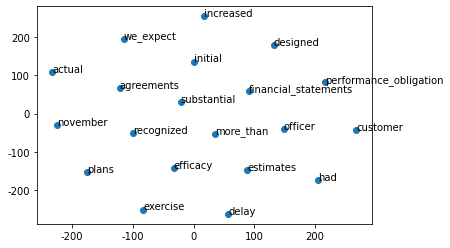

In [93]:
words_vector_tsne = TSNE(n_components=2).fit_transform(words_vector)  # from high dim to dim = 2

plt.figure()
# plt.rcParams['font.sans-serif'] = ['SimHei'] 
# plt.rcParams['axes.unicode_minus'] = False
plt.scatter(words_vector_tsne[:, 0], words_vector_tsne[:, 1])
for i, vec in enumerate(words_vector_tsne):
    x, y = vec[0], vec[1]
    plt.text(x, y, words_name[i], size=10)
plt.show()  # see if similar words are close